In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Import file
df_file_path = 'GeneralEsportData.csv'
df = pd.read_csv(df_file_path, encoding='cp1252')

In [3]:
df.describe

<bound method NDFrame.describe of                                              Game  ReleaseDate  \
0                                  Age of Empires         1997   
1                               Age of Empires II         1999   
2                              Age of Empires III         2005   
3                               Age of Empires IV         2021   
4                           Age of Empires Online         2011   
..                                            ...          ...   
553                Gears of War: Ultimate Edition         2015   
554                                 Knockout City         2021   
555  Mobile Suit Gundam: Extreme Vs Maxi Boost ON         2016   
556                                 Rogue Company         2020   
557                                The Division 2         2019   

                    Genre  TotalEarnings  OnlineEarnings  TotalPlayers  \
0                Strategy      191181.81       156839.89           261   
1                Strategy

In [4]:
df.head()

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,191181.81,156839.89,261,99
1,Age of Empires II,1999,Strategy,2296502.80,720999.87,1528,1140
2,Age of Empires III,2005,Strategy,93913.65,41800.00,139,120
3,Age of Empires IV,2021,Strategy,151091.75,217.00,248,79
4,Age of Empires Online,2011,Strategy,5356.56,775.00,25,17


In [5]:
in_person_earnings = df['TotalEarnings'] - df['OnlineEarnings']

df['InPersonEarnings'] = in_person_earnings

df.head()

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments,InPersonEarnings
0,Age of Empires,1997,Strategy,191181.81,156839.89,261,99,34341.92
1,Age of Empires II,1999,Strategy,2296502.80,720999.87,1528,1140,1575502.93
2,Age of Empires III,2005,Strategy,93913.65,41800.00,139,120,52113.65
3,Age of Empires IV,2021,Strategy,151091.75,217.00,248,79,150874.75
4,Age of Empires Online,2011,Strategy,5356.56,775.00,25,17,4581.56


In [6]:
#df_revbar = pd.DataFrame(df[TotalEarnings], df[OnlineEarnings]), 

In [14]:
df_revbar = df[['OnlineEarnings', 'InPersonEarnings', 'Genre']]

df_revbar = df_revbar.groupby(['Genre']).agg(sum).reset_index()

df_revbar = df_revbar.set_index('Genre')

df_revbar.head()

Index(['Battle Royale', 'Collectible Card Game', 'Fighting Game',
       'First-Person Shooter', 'Multiplayer Online Battle Arena',
       'Puzzle Game', 'Racing', 'Role-Playing Game', 'Sports', 'Strategy',
       'Third-Person Shooter'],
      dtype='object', name='Genre')

Text(0.5, 1.0, 'Esports Genre vs Earnings')

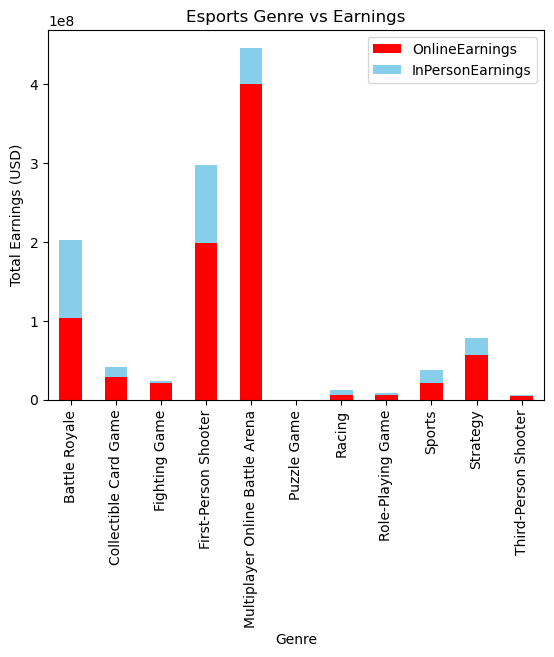

In [8]:
df_revbar.plot(kind='bar', stacked=True, color=['red', 'skyblue'])

plt.xlabel('Genre')
plt.ylabel('Total Earnings (USD)')
plt.title('Esports Genre vs Earnings')

In [9]:
#Subset of the dataframe
genre_df = df.loc[df['Genre'] == 'Battle Royale']

In [10]:
genre_df = genre_df.reset_index()
genre_df = genre_df[['OnlineEarnings', 'InPersonEarnings', 'Game']]
genre_df = genre_df.set_index('Game')

Text(0.5, 1.0, 'Genre vs Earnings for BattleRoyale')

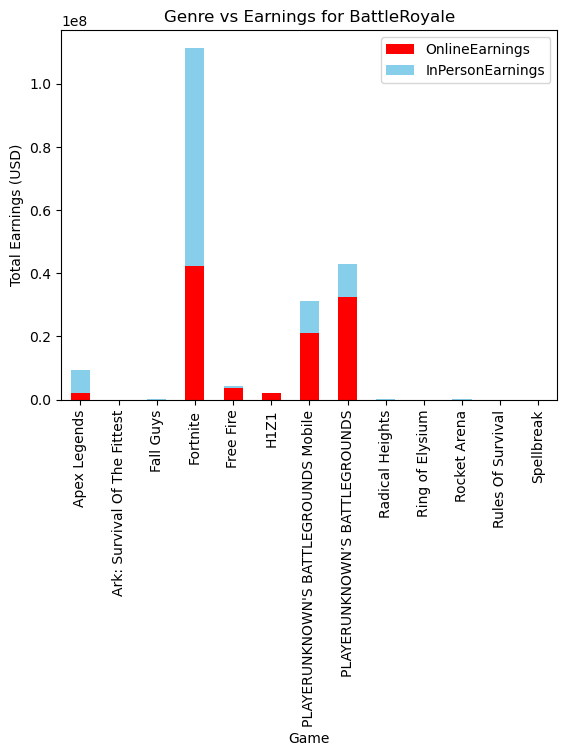

In [12]:
genre_df.plot(kind='bar', stacked=True, color=['red', 'skyblue'])


plt.xlabel('Game')
plt.ylabel('Total Earnings (USD)')
plt.title('Genre vs Earnings for {genre}'.format(genre='BattleRoyale'))

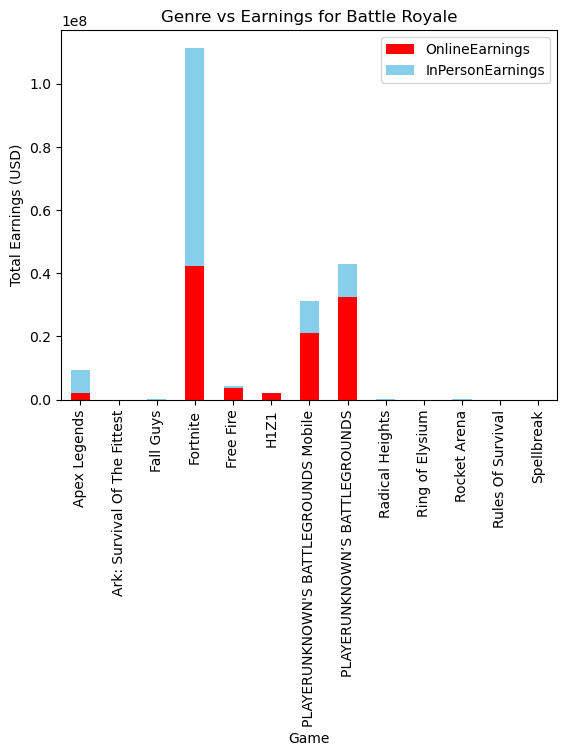

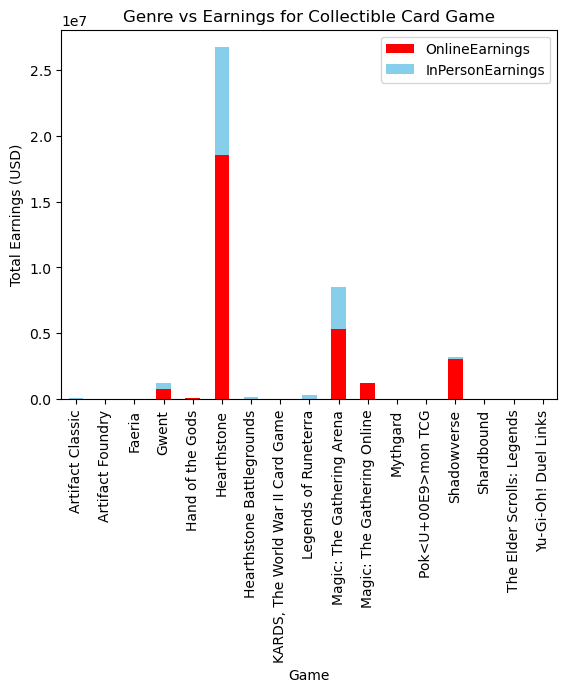

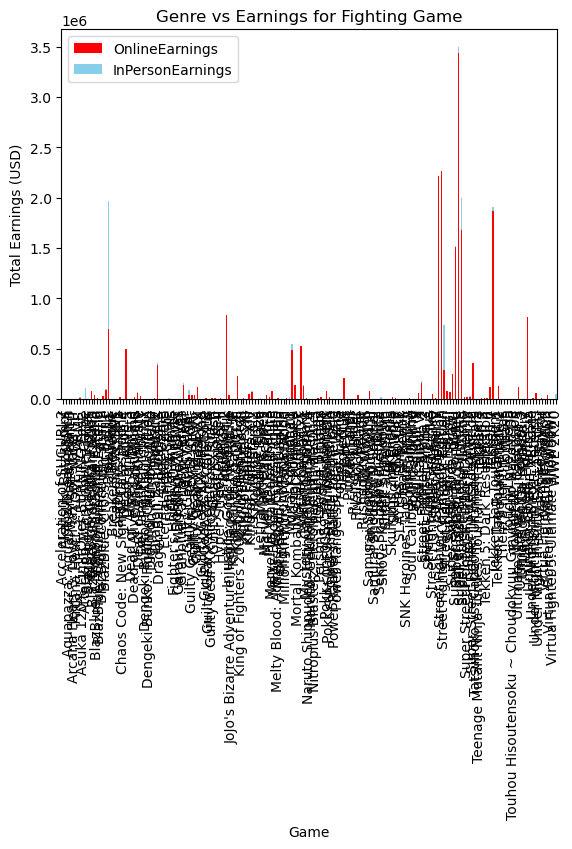

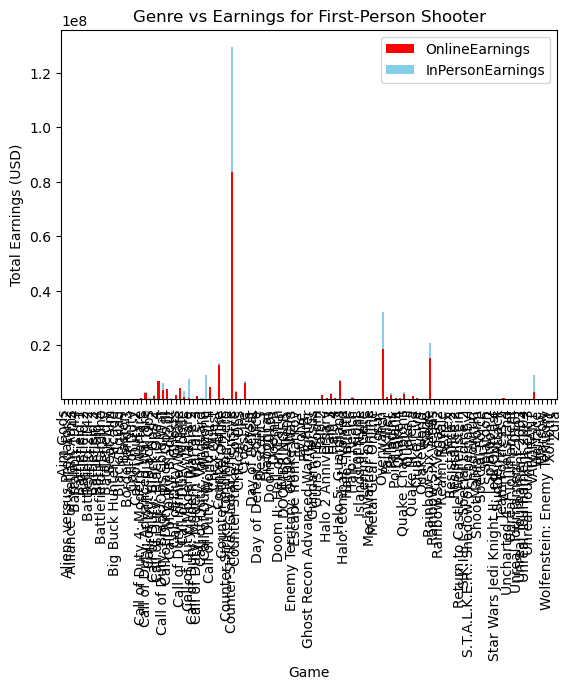

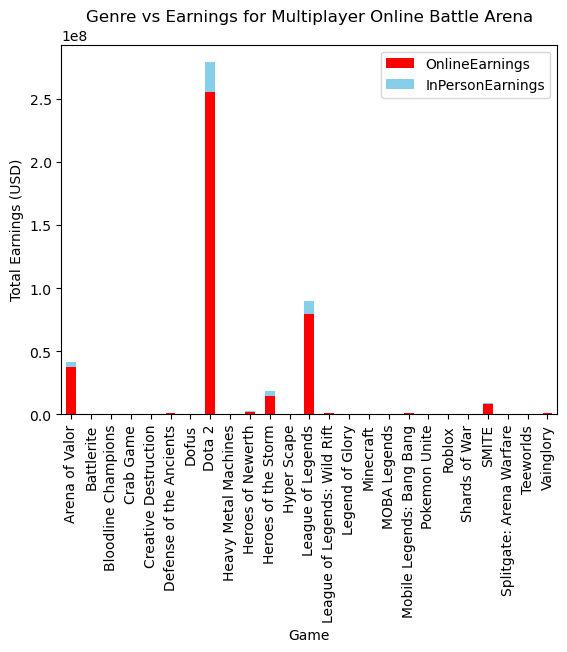

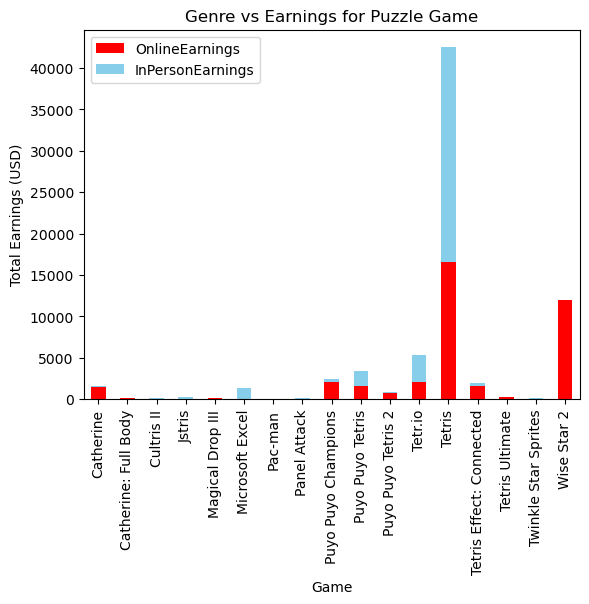

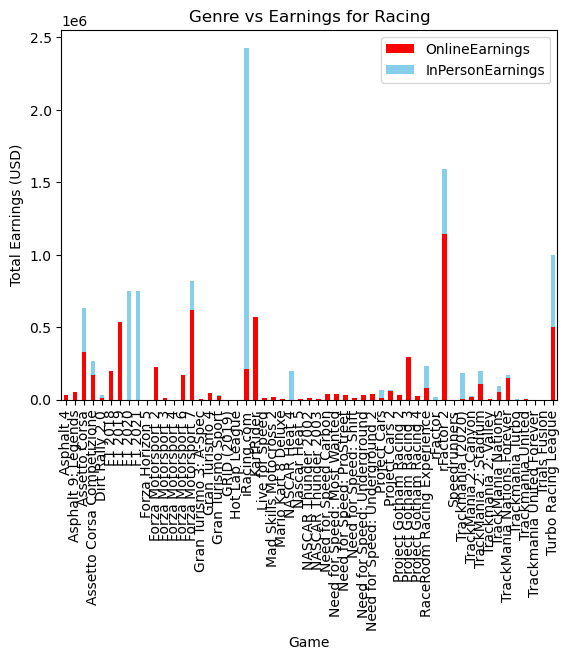

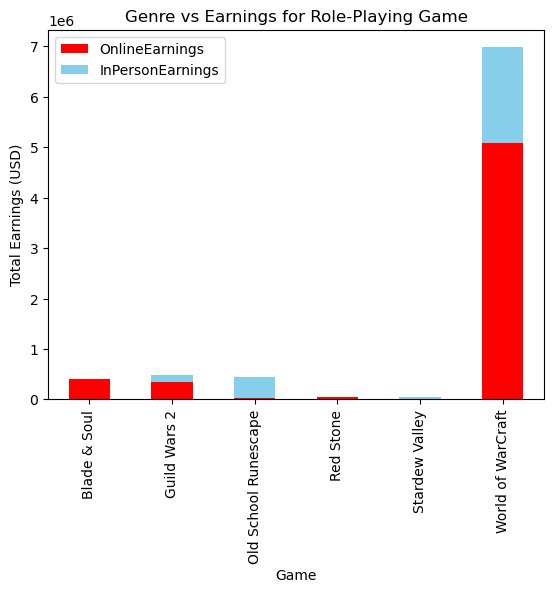

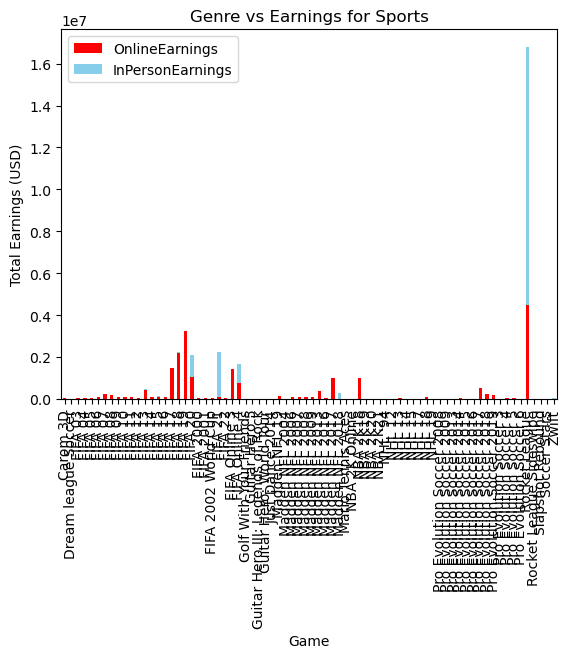

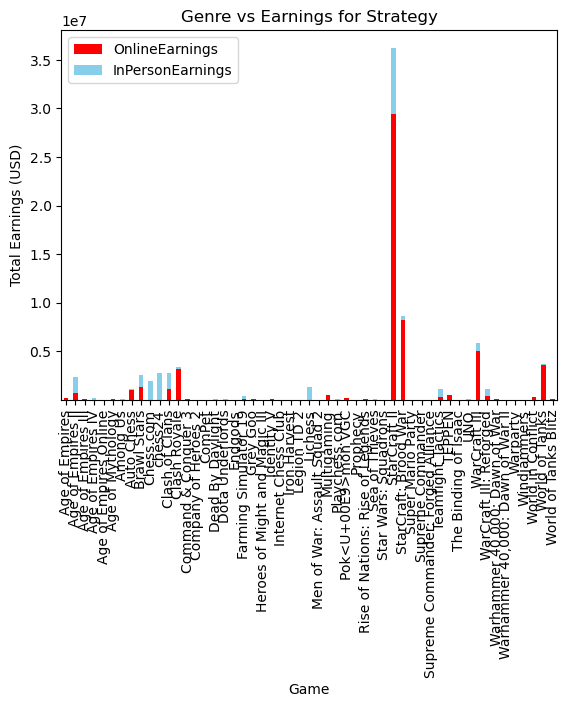

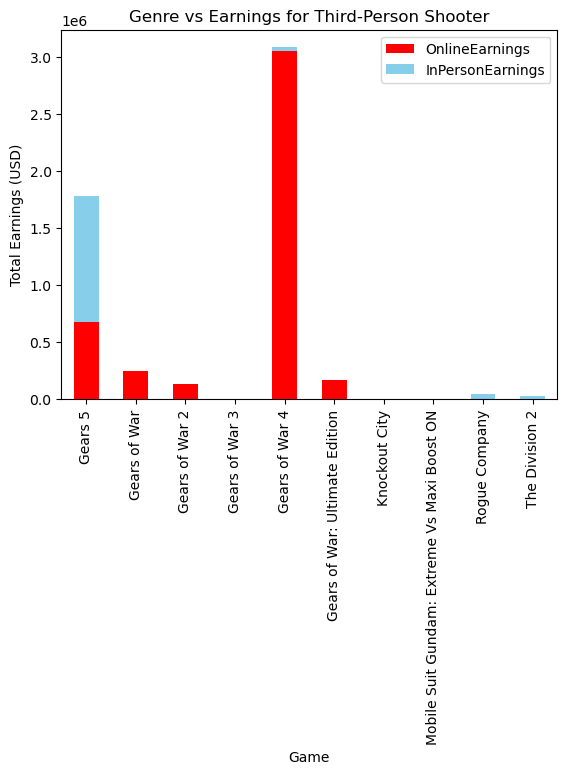

In [15]:
#Recall we smashed the data frame by genre
genre_list = df_revbar.index

for genre in genre_list:
    genre_df = df.loc[df['Genre'] == genre]
    genre_df = genre_df.reset_index()
    genre_df = genre_df[['OnlineEarnings', 'InPersonEarnings', 'Game']]
    genre_df = genre_df.set_index('Game')
    
    genre_df.plot(kind='bar', stacked=True, color=['red', 'skyblue'])


    plt.xlabel('Game')
    plt.ylabel('Total Earnings (USD)')
    plt.title('Genre vs Earnings for {g}'.format(g=genre))
    